In [3]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

In [7]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [9]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [12]:
data.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

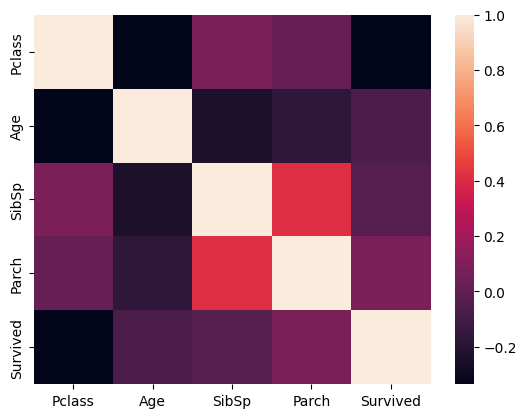

In [15]:
import matplotlib.pyplot as plt
sns.heatmap(data.corr(numeric_only=True))
plt.show()

<Axes: >

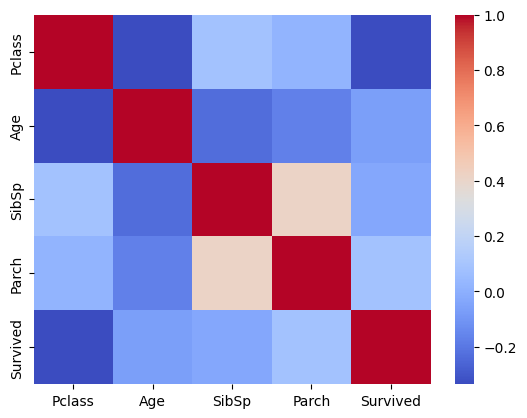

In [19]:
sns.heatmap(data.corr(numeric_only= True), cmap= 'coolwarm')
plt.show()

<Axes: >

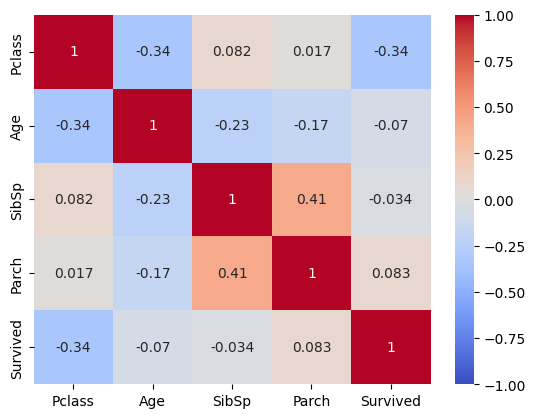

In [23]:
sns.heatmap(data.corr(numeric_only= True), cmap= 'coolwarm', vmin = -1, vmax= 1, annot= True)

In [26]:
data['Name'].nunique()

889

In [27]:
data['Sex'].nunique()

2

In [28]:
data['Ticket'].nunique()

680

In [30]:
data['Embarked'].nunique()

3

In [31]:
data = data.drop(['Name','Ticket'], axis=1)

In [32]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [34]:
pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [35]:
data= pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X = data.drop('Survived', axis=1)
y= data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
pred= model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

In [57]:
model.coef_

array([[-1.18234354, -0.03991188, -0.32140308,  0.00730054, -2.56910288,
        -0.07696271, -0.23548312]])

In [58]:
pd.Series(model.coef_, index = X.columns)

ValueError: Length of values (1) does not match length of index (7)

In [59]:
len(model.coef_[0])

7

In [60]:
pd.Series(model.coef_[0], index= X.columns)

,0
Pclass,-1.182344
Age,-0.039912
SibSp,-0.321403
Parch,0.007301
Sex_male,-2.569103
Embarked_Q,-0.076963
Embarked_S,-0.235483


In [66]:
data['family'] = data['SibSp'] + data['Parch']

In [67]:
data.drop(['SibSp','Parch'], axis=1, inplace = True)

In [68]:
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [78]:
X= data.drop('Survived', axis =1)
y= data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model= LogisticRegression()
model.fit(X_train, y_train)
pred= model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

ａｘｉｓ＝１ 의 의미、 ｉｎｐｌａｃｅ＝Ｔｒｕｅ의 의미